<font size = +3><center><b><u> Phase 3 Project Outline </u></b></center></font>

# Business Understanding

## Business Overview and Objectives

## Project Objectives

# Dataset Understanding

## Setting Up Notebook & Dataset

In [1]:
# Importing Packages Used

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,  make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score
from sklearn.dummy import DummyClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

In [2]:
# Notebook Set-Up for Graphs

sns.set_theme(context='notebook', palette="Set2", 
              style='white', font='sans-serif', font_scale = 1, 
              color_codes=True, rc={'figure.figsize':(16,10)})

%matplotlib inline

In [184]:
# Create Training Dataset: Import & Merge Training Set Features & Labels

training_set_features = pd.read_csv('data/training_set_features.csv')
training_set_labels = pd.read_csv('data/training_set_labels.csv')

df = pd.merge(training_set_features, training_set_labels,  how='inner', on='respondent_id')

In [185]:
# Test Features Dataset

test_set_features = pd.read_csv('data/test_set_features.csv')

In [186]:
## First Examination of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [9]:
df.describe(include=object)

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


## Dataset Overview

 * Basic Data Description
    
 * Why is this data useful
    * Multi-demic context

## Data Exploration

### Feature Selection

The following exclusion criteria was used to retain the most relevant features for analyses:

1. Features irrelevant to current question
   * Respondent ID (no real life meaning)
   * H1N1-centric variables (since the current project only focuses on the seasonal flu vaccine)
   
   
2. Features with excessive missing data ( >20% missing)

In [20]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

#### Features Irrelevant to Current Question

In [212]:
# Remove irrelevant variables from dataset

df.drop(['respondent_id', 'h1n1_vaccine', 'h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
         'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc'], 
        axis=1, inplace=True)

#### Features with Excessive Missing Data

I identified and individually examined all variables with greater than 10% of their data missing

In [213]:
gap_cols = []

for col in df.columns:
    if df[col].isna().sum() > 0.1* len(df.index):
        gap_cols.append(col)

print("Columns with >10% missing data:")
gap_cols

Columns with >10% missing data:


['income_poverty']

##### Not Actually Missing Data: Employment_Industry and Employment Occupation

* Data dictionary indicates employment_industry and employment_occupation are not actually missing. The missing data is because the question was only asked if employment status = "Employed"
  * I will impute "Not Employed" in place for anyone who reported Not Employed below:

In [214]:
# Double checking that every Not Employed person has a NA value for industry & occupation:
print(df[df['employment_status'] != 'Employed']['employment_industry'].value_counts(dropna=False))
print(df[df['employment_status'] != 'Employed']['employment_occupation'].value_counts(dropna=False))

Not Employed    13147
Name: employment_industry, dtype: int64
Not Employed    13147
Name: employment_occupation, dtype: int64


In [215]:
# Replacing 'Not Employed' for relevant rows in employment industry & employment_occupation

df['employment_industry'].mask((df['employment_status'] != 'Employed'), 'Not Employed', inplace=True)
df['employment_occupation'].mask((df['employment_status'] != 'Employed'), 'Not Employed', inplace=True)

##### Actually Missing Data: Examining Health_Insurance and Income_Poverty

In [216]:
print("\t Income Poverty:")
print(df['income_poverty'].value_counts(normalize=True, dropna=False))

print("\n \t Health Insurance:")
print(df['health_insurance'].value_counts(normalize=True, dropna=False))

	 Income Poverty:
2.0    0.478414
3.0    0.254989
NaN    0.165612
1.0    0.100985
Name: income_poverty, dtype: float64

 	 Health Insurance:


KeyError: 'health_insurance'

* *Income Poverty:* **Retain**
    * only 16% of the data is missing & processing pipeline includes imputation.
    
* *Health Insurance:* **Drop**
    * 45% missing, no indication as to why. 
    * Futher, Classes are incredibly imbalanced. 
    * Therefore, might be best to drop instead of impute

In [217]:
df.drop(['health_insurance'], axis=1, inplace=True)

KeyError: "['health_insurance'] not found in axis"

### Describing Variable Types

* *No continuous variables* in this dataset. All variables are either binary, categorical or ordinal.

* Identifying binary, ordinal, and categorical columns:
    1. Using Python and rules of thumb to do a first sort
    2. Adjusting first sort based on knowledge & category examination

In [218]:
binary_col = []
ordinal_col = []
categor_col = []

for col in df.columns:
    if len(df[col].value_counts().index) == 2:
        binary_col.append(col)
    elif col in df.select_dtypes(np.number).columns:
        ordinal_col.append(col)
    else:
        categor_col.append(col)

Rule of thumb divide needed some editing:
* Age_group, education, and income_poverty are **ordinal** (there is a clear order to them), even though they are coded as objects

In [219]:
# Moving age_group, education, income_poverty to ordinal list:

for col in ['age_group', 'education', 'income_poverty']:
    categor_col.remove(col)
    ordinal_col.append(col)

ValueError: list.remove(x): x not in list

In [220]:
# Converting Age_Group, Education, Income_Poverty to Numeric (for now) to make ordinal for data exploration:

age_group_key = dict(zip(list(df['age_group'].value_counts().index), [5, 4, 3, 1, 2]))
education_key = dict(zip(list(df['education'].value_counts().index), [4, 3, 2, 1]))
income_poverty_key = dict(zip(list(df['income_poverty'].value_counts().index), [2, 3, 1]))

In [221]:
df = df.replace({'age_group': age_group_key, 'education': education_key, 'income_poverty': income_poverty_key })

**Variable Descriptions** 

In [222]:
print("Binary Columns:")
print(binary_col)
print("\nOrdinal Columns:")
print(ordinal_col)
print("\nCategorical Columns:")
print(categor_col)

Binary Columns:
['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'sex', 'marital_status', 'rent_or_own', 'seasonal_vaccine']

Ordinal Columns:
['opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'income_poverty', 'household_adults', 'household_children']

Categorical Columns:
['race', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']


### Exploring the Outcome Variable: Seasonal Vaccine

The **outcome variable** of interest is Seasonal_Vaccine, a binary variable.

* 0: Participant Received the Seasonal Flu Vaccine
* 1: Participant Did Not Receive the Seasonal Flu vaccine

In [223]:
# Breakdown by count and ratio:

print(pd.DataFrame(df['seasonal_vaccine'].value_counts().values, index=['No', 'Yes'], columns = ['Count']))

print(pd.DataFrame(df['seasonal_vaccine'].value_counts(normalize=True).values, index=['No', 'Yes'], columns = ['Ratio']))

     Count
No   14272
Yes  12435
        Ratio
No   0.534392
Yes  0.465608


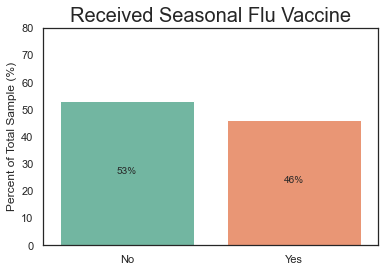

In [224]:
# Graph of Flu Vaccine Recipients (Yes/No) by Percentage (%)

percent = list((df['seasonal_vaccine'].value_counts(normalize=True).values*100).astype(int))

vax = sns.barplot(x = ['No', 'Yes'], y = percent)
vax.set_ylabel("Percent of Total Sample (%)")
vax.set_ylim(0, 80)
vax.set_title('Received Seasonal Flu Vaccine', fontsize=20);

for loc, label in enumerate(percent):
    vax.text(loc, label/2, (str(int(round(label, ndigits=0))) + '%'), ha='center');

**Takeaways about Seasonal Flu Vaccine Distribution:**

* Similar breakdown of Yes/No Responses: close to 50-50
* Fairly Balanced Classes
    * Beneficial for many machine learning algorithms

### Exploring Predictor Variables: Distributions

Using Bar Plots to examine predictor variable distributions:

In [225]:
len(df['age_group'].value_counts().index)

5

In [226]:
# Taking only predictor variables & making categorical variables to numeric, to avoid x label overlap
graph_df = df.copy()
graph_df.drop('seasonal_vaccine', axis=1, inplace=True)

for col in list(graph_df.select_dtypes(object).columns):
    k = (list(df[col].value_counts().index))
    v = range(0, len(df[col].value_counts().index))
    data_dict = dict(zip(k,v))
    graph_df = graph_df.replace({col:data_dict})

Index(['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'employment_occupation'],
      dtype='object')

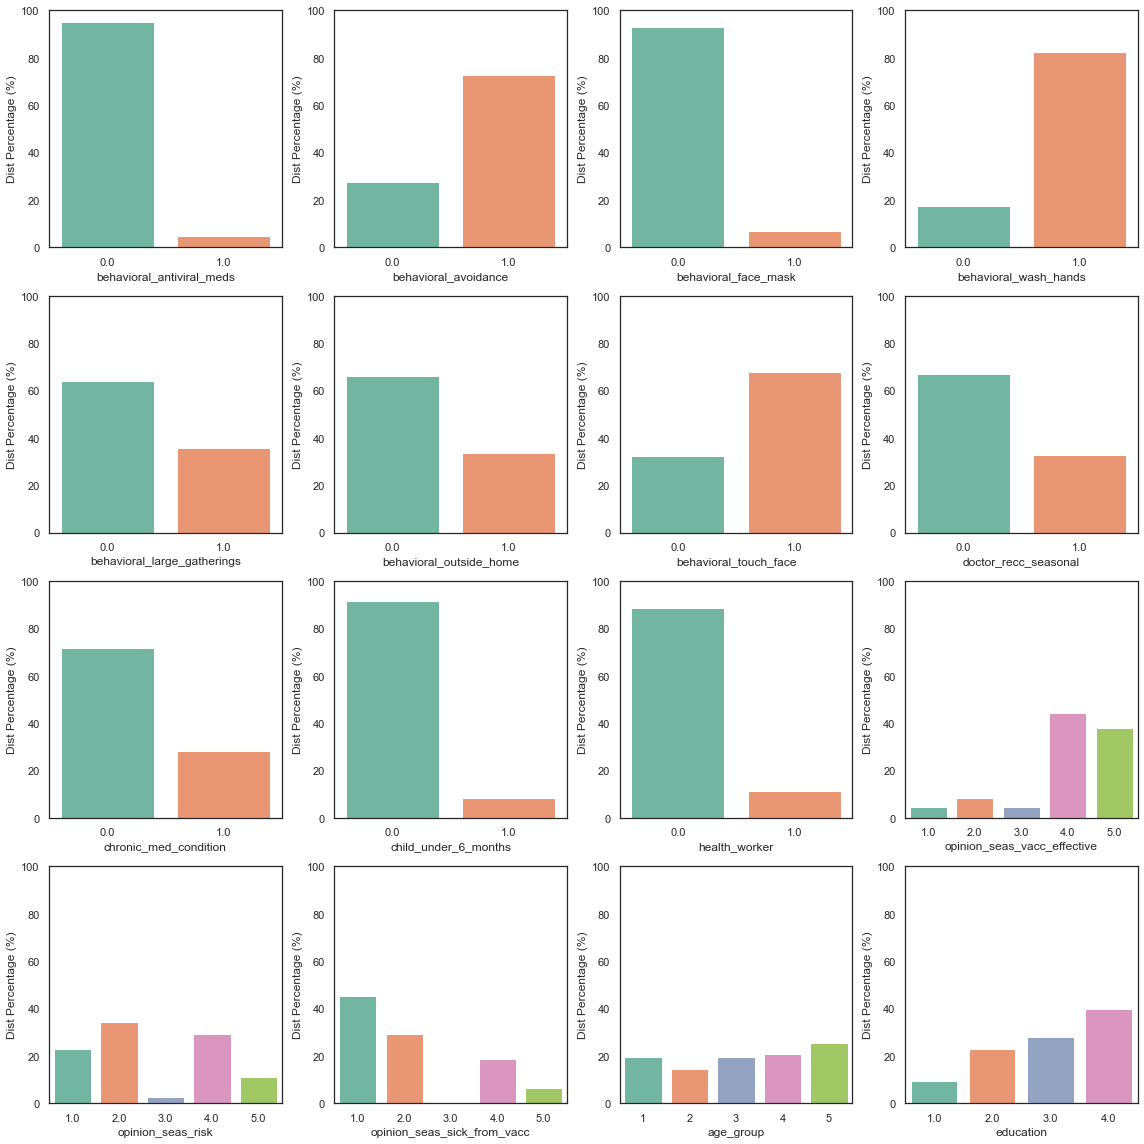

In [228]:
fig, ax = plt.subplots(4,4, figsize=(16,16))

for i, col in enumerate(graph_df.columns[0:16]):
    ax1 = i//4
    ax2 = i%4
    x = list(graph_df[col].value_counts().index)
    y = list((graph_df[col].value_counts(normalize=True).values)*100)
    sns.barplot(data=graph_df, x=x, y=y, ax=ax[ax1][ax2]).set(xlabel=col, ylabel='Dist Percentage (%)', ylim = (0, 100))
    
plt.tight_layout();

In [236]:
graph_df.columns[25:]

Index(['household_children', 'employment_industry', 'employment_occupation'], dtype='object')

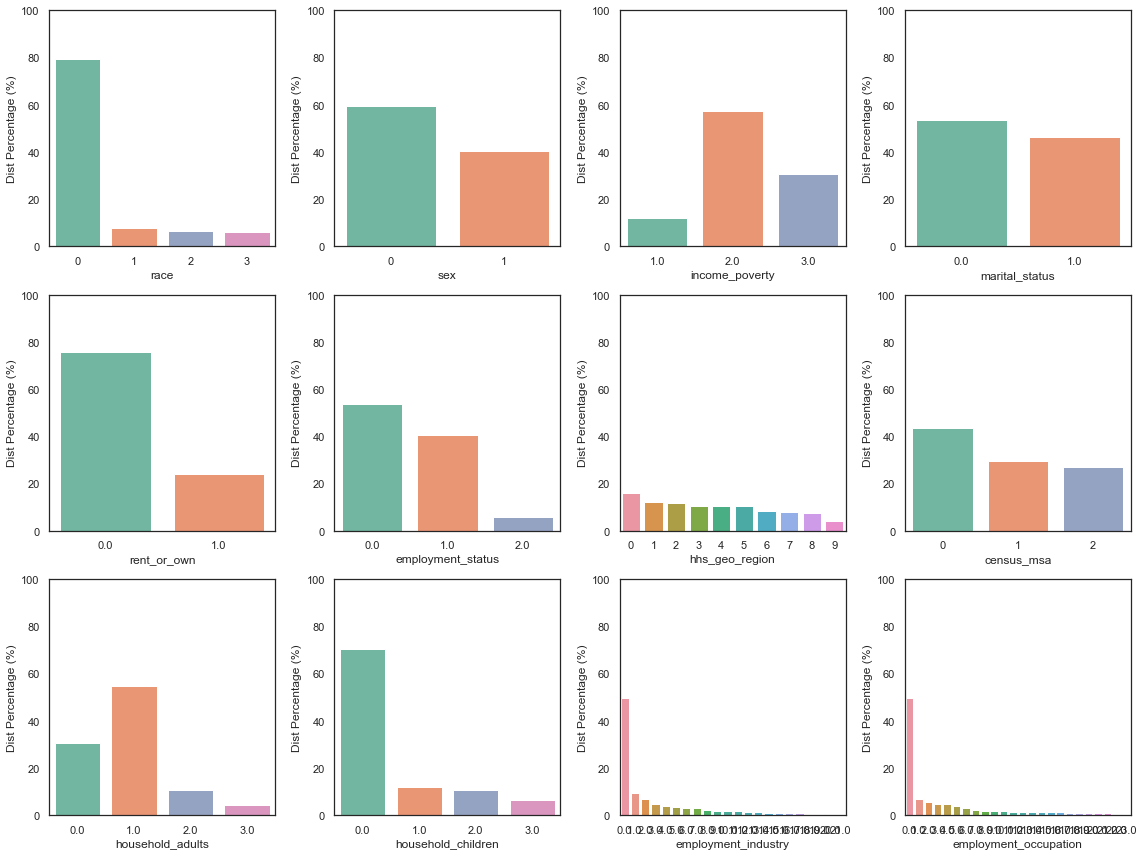

In [242]:
fig, ax = plt.subplots(3,4, figsize=(16,12))

for i, col in enumerate(graph_df.columns[16:]):
    ax1 = i//4
    ax2 = i%4
    x = list(graph_df[col].value_counts().index)
    y = list((graph_df[col].value_counts(normalize=True).values)*100)
    sns.barplot(data=graph_df, x=x, y=y, ax=ax[ax1][ax2]).set(xlabel=col, ylabel='Dist Percentage (%)', ylim = (0, 100))
    
plt.tight_layout();

### Overall Relationships Between Variables

#### Heat Map

#### Graphing Seasonal Vaccine breakdown by Category for each Predictor

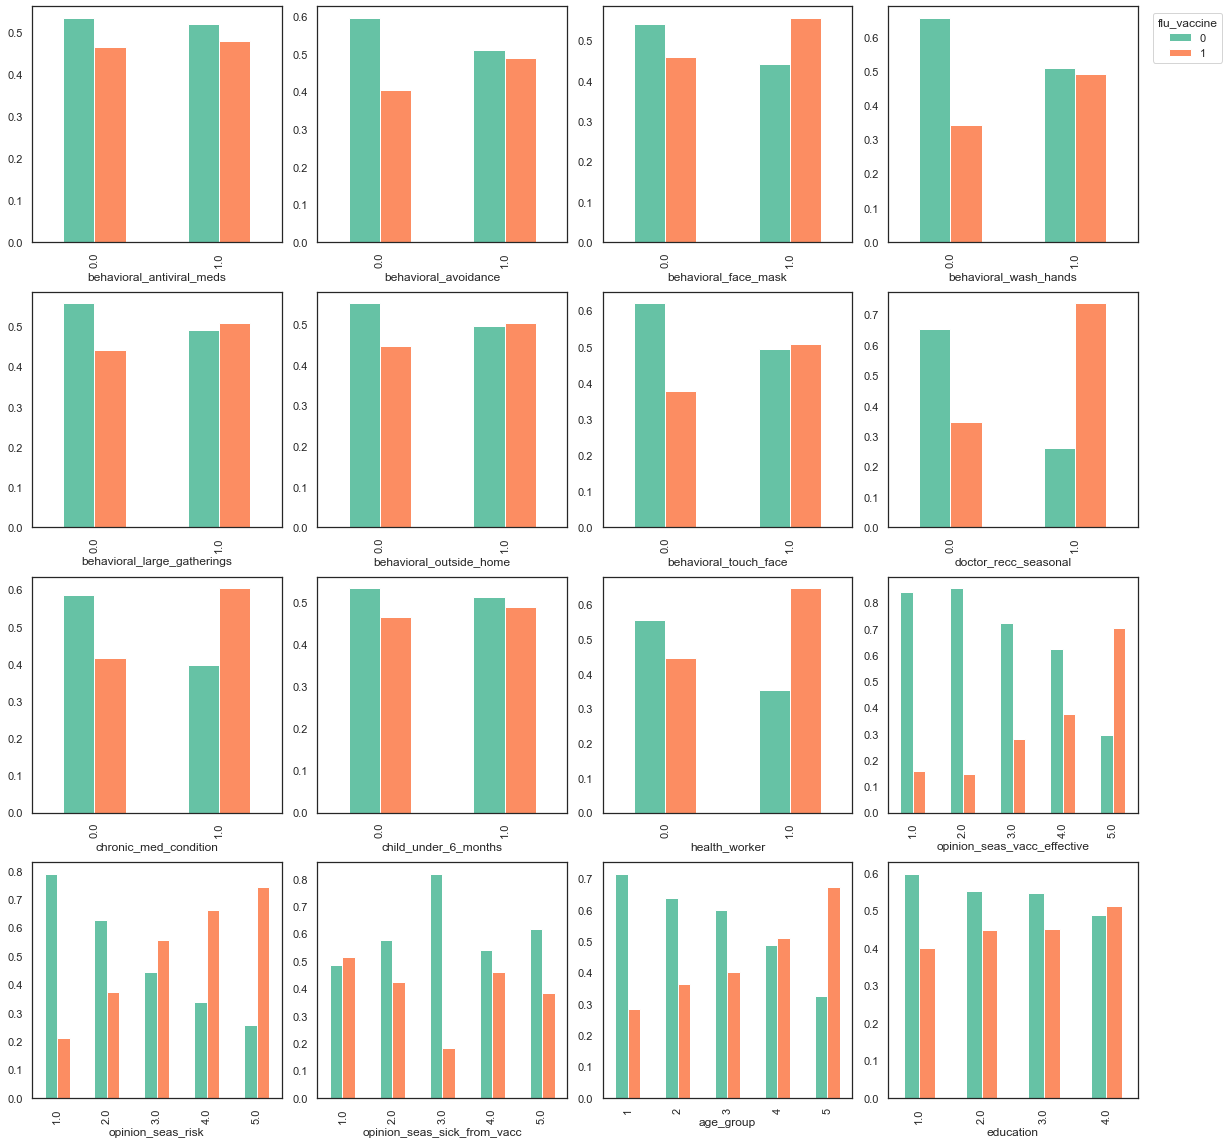

In [243]:
fig, ax = plt.subplots(4,4, figsize=(16,16))

for i, col in enumerate(graph_df.columns[0:16]):
    x = i//4
    y = i%4
    pd.crosstab(graph_df[col], df['seasonal_vaccine'], normalize='index').plot(kind='bar', ax=ax[x][y], legend=False)

plt.tight_layout()
plt.legend(
    loc='center', 
    bbox_to_anchor=(1.2, 4.5), 
    title='flu_vaccine'
);

<font size = +1.25><i><u> Observations Part 1: </u></i></font>

* Behavioral Variables:
   * All show probable relationship to seasonal vaccine status except for *antiviral-meds*
       * Anti-Viral meds: similar distribution regardless of vaccination status.
       

* Opinion Variables:
    * Clear relationships for effectiveness & risk
    * Murky relationship for sick_from_vaccine
        * Possible that some people who fear getting sick from the vaccine would be more afraid of getting the flu
        
     
* Misc variables: 
    * *Strong relationships:* Doctor Recommendation, Chronic Med Condition, Health Worker, Age Group
    * *Weak/Murky Relationships*: Child Under 6 monnths, Education
 

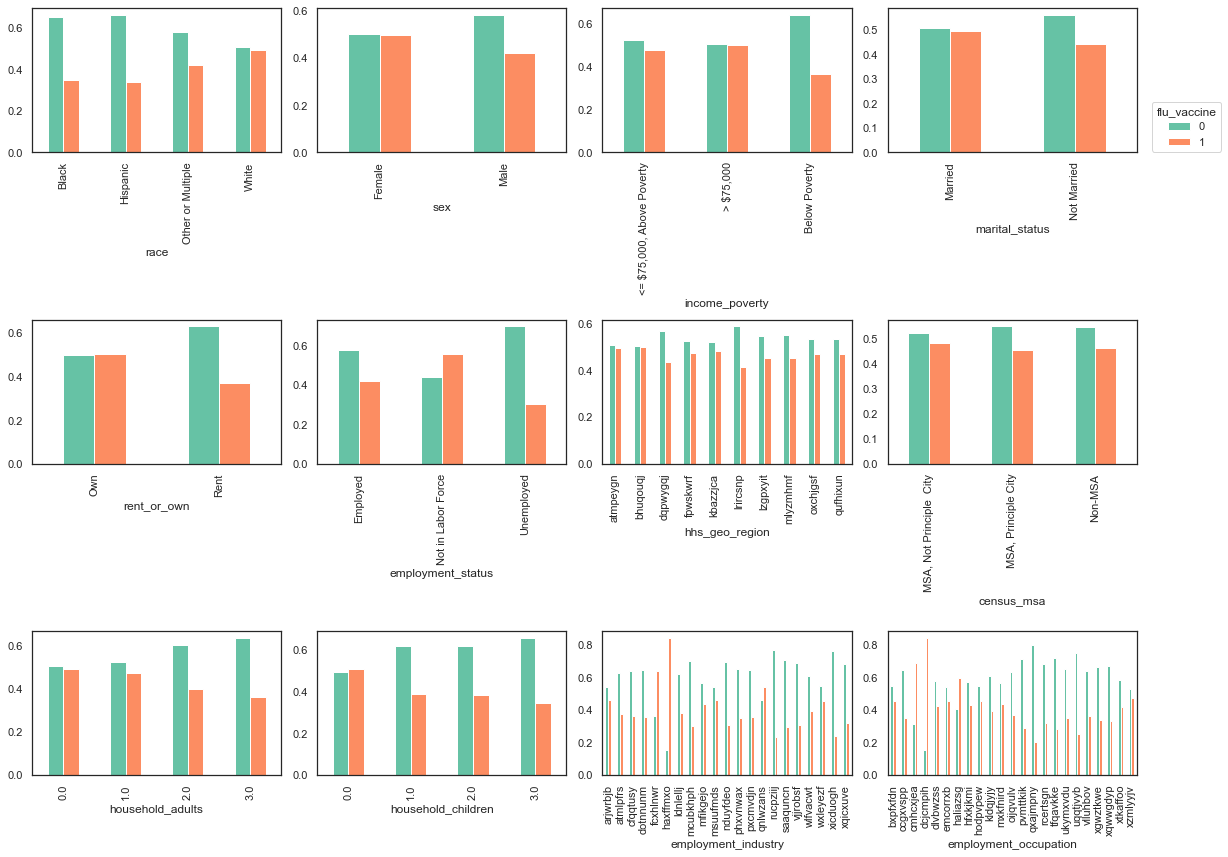

In [105]:
fig, ax = plt.subplots(3,4, figsize=(16,12))

for i, col in enumerate(graph_df.columns[16:]):
    x = i//4
    y = i%4
    pd.crosstab(graph_df[col], df['seasonal_vaccine'], normalize='index').plot(kind='bar', ax=ax[x][y], legend=False)

plt.tight_layout()
plt.legend(
    loc='center', 
    bbox_to_anchor=(1.2, 4.5), 
    title='flu_vaccine'
);

<font size = +1.25><i><u> Observations Part 2: </u></i></font>

**Notable Relationships:** Race, Sex, Income_Poverty, Rent or Own, Employment Status, Household Children

**Also Notable:** Employment_Industry and Employment_Occupation, but categories are uninterpretable bc kept confidential!
   * Less utility for our explanatory analyses, but still useful for the model to learn.
   
   
**Probable Relationships:** Marital Status, Household_Adults

**Murky/Not Notable Relationships:** HHS_Geo_Region, MSA

## Data Quality

### Data Reliability: Faulty Data?

* Most of the data seems reliable: does not raise concerns about notability.


* However, possible Faulty Data in one column:

    1. Household_adults
        * How can there be 0 adults in a household? 
        * Need to examine data dictionary

### Missing Data

* Already dealt with columns with significant missing data in Feature Selection section (2.1)

* Columns with some/any amount of missing data: all but 6
    * Imputation will be needed

**Imputation Strategy:**

1. Imputation will be handled in the Processing Pipeline
2. Numeric variables - impute with Mean
3. Categorical variables - impute with Most Frequent 

### Variable Formatting

* Fix 3 ordinal columns: Need to add order indication to
    1. Age Group
    2. Education
    3. Income
    
    
* Some long/clunky category names that could be reformatted
    1. Income Poverty - rename variable(*income*) and categories (*low, mid, high*)
    2. MSA - might be useful to shorten category names (*MSA-NPC, MSA-PC, Non-MSA*)

# Business Insights from Data Exploration

* Secondary questions + descriptive analyses to answer each

* Planning vaccine inventory based on population: what/how much of each type of vaccines to produce?
* How can Amerisource Bergen support efforts to get more people vaccinated?

1. Elderly
2. Chronic Illness
3. Doctor Recommendation

# Data Preparation

## Reformatting Variables

## Data Construction

## Pre-Processing Pipeline

# Data Modeling

## Modeling Strategy

### Modeling Techniques

### Metrics of Interest

### Test Design

### Outline of Modeling Plan

0. Baseline Model

1. First Simple Model (Logistic Regression Model --> should I change to decision tree?)
   * Why Logistic Regression
   * Compare Parameter Influences

2. Random Forest Model

3. Tuned Random Forest Model

## Baseline Model

## First Simple Model (#1): Logistic Regression

## Model #2 : Random Forest Model

## Final Model (#3): Tuned Random Forest Model

# Evaluation of Final Model

# Conclusion

## Next Steps: Model Deployment & Recommendations

## Limitations and Future Directions